In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
data=pd.read_csv('datafram_classification.csv')

The purpose of this notebook is to present our classification methodology. The outputs we are interested in will be displayed on the interface provided for this purpose.

In [4]:
df_class=data[['Bathrooms', 'Bedrooms', 'Beds', 'Price']]
df_class

,Bathrooms,Bedrooms,Beds,Price
0,1.0,1.0,1.0,47.68
1,1.0,1.0,1.0,103.84
2,1.0,2.0,3.0,104.96
3,1.0,1.0,1.0,37.12
4,1.0,2.0,2.0,96.48
...,...,...,...,...
486983,1.0,1.0,2.0,57.33
486984,1.0,1.0,1.0,42.12
486985,1.0,1.0,1.0,25.74
486986,1.0,1.0,1.0,23.40


In [5]:
#We create the elbow function 

inertia=[]
K_range=range(1,20)
for k in K_range:
    model=KMeans(n_clusters=k).fit(df_class)
    inertia.append(model.inertia_)

    

Text(0, 0.5, 'Cost of the model')

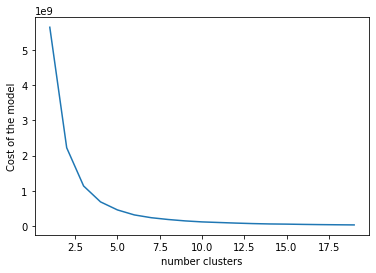

In [6]:

plt.plot(K_range,inertia)
plt.xlabel('number clusters')
plt.ylabel('Cost of the model')

We can see that on the whole of the cities which make up our datatram, the number of pertinent clusters seems to be 3. We notice that in all the cities we find similar class patterns. We will therefore develop this in our analysis in this sense.

In [10]:
#Preparing the input data for the dendogram
standard_scaler=StandardScaler()
df_clust=df_class[['Bathrooms', 'Bedrooms', 'Beds', 'Price']]
df_clust[['Bathrooms', 'Bedrooms', 'Beds', 'Price']] = standard_scaler.fit_transform(df_clust[['Bathrooms', 'Bedrooms', 'Beds', 'Price']])
sample=df_clust.sample(n=5000)
sample

,Bathrooms,Bedrooms,Beds,Price
217207,1.325044,0.712141,0.754872,0.673631
114953,-0.413076,-0.394756,0.065221,-0.837089
137821,-0.413076,0.712141,0.065221,0.320173
391523,-0.413076,0.712141,0.065221,-0.378383
82416,2.194105,2.925935,2.823824,0.619289
...,...,...,...,...
441737,-0.413076,-1.501653,-0.624430,-0.087163
332062,0.455984,0.712141,0.065221,2.586765
176877,5.670346,2.925935,1.444522,5.020564
50383,-2.151197,-0.394756,0.754872,-0.597982


C:\Users\RhythmOne\anaconda\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


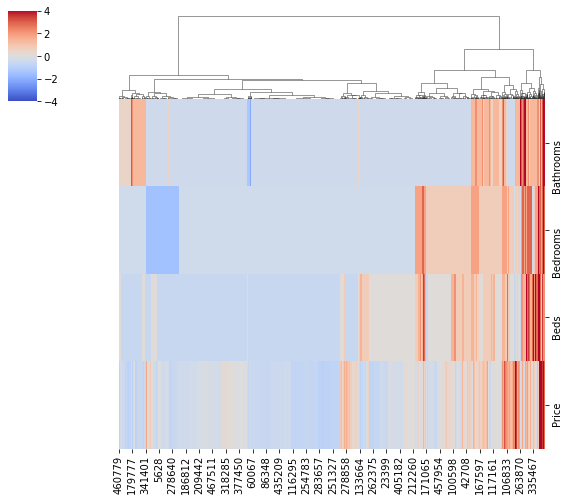

In [11]:
# We trace le Dendogramme
clust_hier=sns.clustermap(sample.T, figsize=(8,7), metric='euclidean', method='ward',cmap='coolwarm',
                           col_cluster=True,row_cluster=False,center=0, vmin=-4,vmax=4)

Hierarchical clustering enables us to clearly identify 3 classes. This confirms the position given by the ELbow curve. We have a top class (in dark red) with dwellings that have very high levels of our variables of interest. This class is small given the extreme characteristics. Secondly, we identify a class that represents the majority of the data and is illustrated by carastrics below the average of the other classes. Finally we find a more moderate class with characteristics that are rather above average. Now that we have made an overview of the classes. We will continue our analysis with 3 clusters.

In [58]:
#We isolate our variables of interest
#Example of City to test : Berlin, Paris, London, Roma, Los Angeles...

City=input("Enter the city where your housing is located : ")
df_kmeans=data[['Bathrooms', 'Bedrooms', 'Beds', 'Price', 'City']]
df_city=df_kmeans[(df_kmeans["City"]==City)] 
df_city=df_city.drop(columns=["City"])
df_city


Enter the city where your housing is located : Berlin


,Bathrooms,Bedrooms,Beds,Price
7029,1.0,1.0,1.0,35.10
7030,1.0,1.0,1.0,28.08
7031,2.0,0.0,2.0,117.00
7032,1.0,1.0,2.0,33.93
7033,1.0,1.0,1.0,76.05
...,...,...,...,...
486982,1.0,1.0,1.0,18.72
486984,1.0,1.0,1.0,42.12
486985,1.0,1.0,1.0,25.74
486986,1.0,1.0,1.0,23.40


In [59]:
# We get the input line from the flat and add it to the dataframe before applying the kmeans


price=input("please enter the price of your housing  ")
beds=input("please enter the number of beds in your housing ")
bedrooms=input("please enter the number of bedrooms in your housing ")
bathrooms=input("vplease enter the number of bathrooms in your housing ")
                
df_city.loc[len(df_city.index)+1] = [bathrooms,bedrooms,beds,price]
df_city
        

please enter the price of your housing  140
please enter the number of beds in your housing 2
please enter the number of bedrooms in your housing 2
vplease enter the number of bathrooms in your housing 1


,Bathrooms,Bedrooms,Beds,Price
7029,1.0,1.0,1.0,35.1
7030,1.0,1.0,1.0,28.08
7031,2.0,0.0,2.0,117.0
7032,1.0,1.0,2.0,33.93
7033,1.0,1.0,1.0,76.05
...,...,...,...,...
486984,1.0,1.0,1.0,42.12
486985,1.0,1.0,1.0,25.74
486986,1.0,1.0,1.0,23.4
486987,2.0,1.0,1.0,35.1


In [60]:
# We normalize the continuous data in order to put them on the same scale ([0,1])

min_max_scaler = MinMaxScaler()
df_city[['Bathrooms', 'Bedrooms', 'Beds', 'Price']] = min_max_scaler.fit_transform(df_city[['Bathrooms', 'Bedrooms', 'Beds', 'Price']])
df_city

,Bathrooms,Bedrooms,Beds,Price
7029,0.125,0.1,0.000000,0.030151
7030,0.125,0.1,0.000000,0.024121
7031,0.250,0.0,0.066667,0.100503
7032,0.125,0.1,0.066667,0.029146
7033,0.125,0.1,0.000000,0.065327
...,...,...,...,...
486984,0.125,0.1,0.000000,0.036181
486985,0.125,0.1,0.000000,0.022111
486986,0.125,0.1,0.000000,0.020101
486987,0.250,0.1,0.000000,0.030151


In [61]:
#We use kmeans
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(df_city)

#Here we find the prediction of the user's housing data
target_predict=label[-1]
print(" l'appartement du particulier appartient à la classe "+ str(target_predict))

 l'appartement du particulier appartient à la classe 1


In [62]:
#We create the column with the labels of the clusters
df_city["cluster"]= label
df_city["cluster"].value_counts()

0    16494
1     3315
2      638
Name: cluster, dtype: int64

In [63]:
#We display the average characteristics per cluster
cluster_means=df_city.groupby("cluster")['Bathrooms', 'Bedrooms', 'Beds', 'Price'].mean()
cluster_means

C:\Users\RHYTHM~1\AppData\Local\Temp/ipykernel_14892/436273741.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means=df_city.groupby("cluster")['Bathrooms', 'Bedrooms', 'Beds', 'Price'].mean()


,Bathrooms,Bedrooms,Beds,Price
cluster,,,,
0,0.132116,0.095077,0.013932,0.046922
1,0.141893,0.189593,0.115515,0.088771
2,0.208562,0.302508,0.335841,0.168569


In [64]:
# The groupby function below will help us with the following interpretation.
df_with_Property_Type=pd.read_csv('df_with_Property Type.csv')
df_with_Property_Type.groupby("Property Type")["Price"].mean()

Property Type
Apartment           133.618501
Atypical housing    151.640509
Hotel                88.112474
House               155.912311
Other               147.482862
Villa               163.732915
Name: Price, dtype: float64

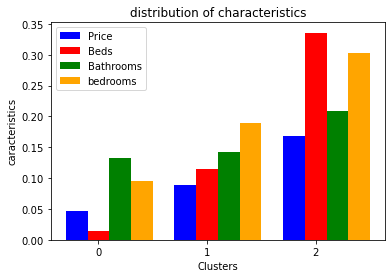

In [65]:
#We display the average characteristics per cluster 

cluster_id=[0,1,2]
index = np.arange(3)
width = 0.2

plt.bar(index,cluster_means["Price"], width, color="blue", label="Price")
plt.bar(index+width, cluster_means["Beds"], width, color="red", label="Beds")
plt.bar(index+2*width,cluster_means["Bathrooms"], width, color="green", label="Bathrooms")
plt.bar(index+3*width,cluster_means["Bedrooms"], width, color="orange", label="bedrooms")
plt.title("distribution of characteristics")
plt.xlabel("Clusters")
plt.ylabel("caracteristics")

plt.xticks(index+2*width/2,cluster_id )

plt.legend(loc="best")
plt.show()

As we can see, there are always 3 classes that can be distinguished. First of all, we identify the class that we will call "luxury", characterised by very high prices and large spaces in view of the level of furniture. This class includes villas and houses, especially in view of the few observations made. Then there is a class with lower than average prices and very limited furniture. Here we are thinking in particular of hotels and small flats which are often characterised by this type of profile as we have seen before in our analysis. Finally, there is a more moderate class with prices slightly higher than average and a rather balanced level of furnishings. Here we are thinking in particular of the classic, rather family flats.